## Fitting Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

def income_model_data_prep(data):
    data = pd.get_dummies(
        income.assign(
                target = np.where(data["SalStat"]==" less than or equal to 50,000", 0,1),
                nativecountry = data["nativecountry"].str.replace(" Holand-Netherlands",
                                                         " Germany"),
                JobType = data["JobType"].replace({" Never-worked":" Without-pay"}),
                occupation = data["occupation"].str.replace(" Armed-Forces"," ?")
                ).drop("SalStat",axis=1),
        drop_first=True
    )
    X = data.drop(columns=["target"],axis=1)
    y = data["target"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    return X_train, X_test, y_train, y_test

In [3]:
## Split train and test datasets

income = pd.read_csv("../Data/income.csv")

X_train, X_test, y_train, y_test = income_model_data_prep(income)

In [16]:
## fit the model using Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
# lr = logreg.fit(X_train[["age","hoursperweek"]],y_train)
lr = logreg.fit(X_train,y_train)

/opt/anaconda3/envs/jupyterlab-debugger/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# print(f'Train accuracy: {lr.score(X_train[['age','hoursperweek']],y_train)}')
# print(f'test accuracy : {lr.score(X_test[['age','hoursperweek']],y_test)}')

print(f'Train accuracy: {lr.score(X_train,y_train)}')
print(f'test accuracy : {lr.score(X_test,y_test)}')



Train accuracy: 0.8421937299663826
test accuracy : 0.8502188868042526


In [18]:
from sklearn.metrics import confusion_matrix

# confusion_matrix(y_test, lr.predict(X_test[['age','hoursperweek']]))
confusion_matrix(y_test, lr.predict(X_test))

array([[4539,  313],
       [ 645,  899]])

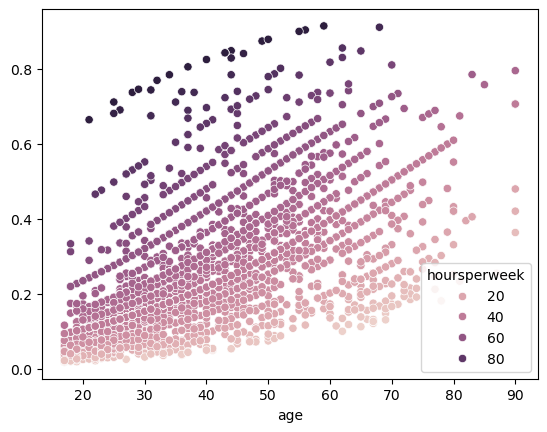

In [7]:
sns.scatterplot(
    x=X_test["age"],
    y=lr.predict_proba(X_test[["age","hoursperweek"]])[:,1],
    hue=X_test["hoursperweek"]
);

In [19]:
lr.coef_

array([[ 1.33670147e-04,  3.77310632e-04,  5.43218868e-04,
         6.33871253e-03,  1.02868175e-01, -9.69445429e-02,
        -2.00233660e-01,  1.45579759e-01, -3.73915580e-01,
        -8.88431917e-02, -7.48711259e-03, -2.84213604e-01,
        -9.56121781e-02, -5.39700796e-02, -1.23457819e-01,
        -2.16695390e-01, -1.45955650e-01, -2.92926076e-02,
        -2.52567669e-02,  5.52880772e-01,  1.82833374e-01,
        -7.82077951e-01,  4.15285623e-01, -2.02369100e-02,
         2.17211667e-01, -2.77434921e-01,  1.40317395e-02,
         9.73046782e-01, -6.39445062e-02, -1.21334365e+00,
        -1.43524533e-01, -9.20635895e-02, -2.38053020e-01,
        -2.29803172e-01,  7.07253625e-01, -2.89447332e-01,
        -2.68032150e-01, -2.86436940e-01, -5.89452828e-01,
        -3.11134777e-02,  5.79732370e-01,  1.60633284e-02,
         1.37476040e-01,  9.77191334e-02, -1.19978713e-01,
        -4.33540082e-01, -2.07160654e-01, -8.63212987e-01,
        -4.69608035e-01,  2.05564156e-01, -1.16302601e-0

In [20]:
lr.intercept_

array([-0.92327721])

In [21]:
X_train.columns

Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek',
       'JobType_ Federal-gov', 'JobType_ Local-gov', 'JobType_ Private',
       'JobType_ Self-emp-inc', 'JobType_ Self-emp-not-inc',
       'JobType_ State-gov', 'JobType_ Without-pay', 'EdType_ 11th',
       'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th',
       'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc',
       'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad',
       'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school',
       'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse',
       'maritalstatus_ Married-civ-spouse',
       'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married',
       'maritalstatus_ Separated', 'maritalstatus_ Widowed',
       'occupation_ Adm-clerical', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct'

In [22]:
coef_df = pd.DataFrame(
    {
        "features":X_train.columns,
        "coef.":lr.coef_[0]
    }
)

coef_df

,features,coef.
0,age,0.000134
1,capitalgain,0.000377
2,capitalloss,0.000543
3,hoursperweek,0.006339
4,JobType_ Federal-gov,0.102868
...,...,...
89,nativecountry_ Thailand,-0.004650
90,nativecountry_ Trinadad&Tobago,-0.004413
91,nativecountry_ United-States,-0.386532
92,nativecountry_ Vietnam,-0.024506
